# Glucose Control in Patients With Type I Diabetes
$\hspace{10mm}$Lizett Pink, Andrew Spitzer, Travis Tredway & Kyle Vachon

$\hspace{10mm}$Professor Jeffrey C. Kantor

$\hspace{10mm}$University of Notre Dame

$\hspace{10mm}$Department of Chemical and Biomolecular Engineering

$\hspace{10mm}$Chemical Process Control

$\hspace{10mm}$4 May 2017

## Contents

* [1. Problem Statement](#Section00)
* [2. Theoretical Development](#Section01)
     * [A. Governing Equations](#Section02)
     * [B. Block Diagram](#Section03)
     * [C. Implementing PID Control](#Section04)
* [3. Positive Disturbance: Exposure to a Meal](#Section05)
     * [A. Initial Conditions - Varied Insulin Input Rate by Controller](#Section06)
     * [B. Closer Look at Ideal Insulin Input Rate](#Section07)
     * [C. Constant Insulin Input Rate Simulation](#Section08)
     * [D. PI Controlled Insulin Input Rate](#Section09)
* [4. Negative Disturbance: Exposure to Exercise](#Section10)
     * [A. Constant Insulin Input Rate Simulation](#Section11)
     * [B. PI Controlled Insulin Input Rate](#Section12)
* [5. Combined Disturbances: Snack, Exercise, Meal](#Section13)
     * [A. Constant Insulin Input Rate Simulation](#Section14)
     * [B. PI Controlled Insulin Input Rate](#Section15)
     * [C. Interactive PID Controlled Simulation](#Section16)
* [6. Conclusion](#Section17)
* [7. Literature Cited](#Section18)

<a id='Section00'></a>
## 1. Problem Statement

   In healthy individuals, the pancreas serves to regulate the concentration of blood sugar, the body’s main source of energy.  As blood glucose rises, pancreatic $\beta$-cells release insulin which stimulates the uptake of glucose by muscle and fat tissue.  However, in patients with Type I Diabetes, pancreatic $\beta$-cells fail to release insulin upon an increase in blood glucose.  Insufficient secretion of insulin by the pancreas results in large excursions of glucose outside of the body’s target range of 80 - 120 $\frac{mg}{dL}$.  Often, this results in periods of hyperglycemia, or elevated glucose levels.  When in a hyperglycemic state, diabetic patients have an increased risk of developing neuropathy and retinopathy, chronic conditions which can ultimately lead to amputation and blindness, respectively.  Furthermore, as a result of excursions below the target glucose range - caused by not eating or by over-regulating insulin levels, for example - the body can enter a state of hypoglycemia.  In severe cases, this condition can cause seizures and ultimately death.  

   The main disturbances to glucose levels within the body include the consumption of food and periods of increased physical activity.  Since college students are constantly exposed to factors which may cause their blood sugar to deviate from a healthy, steady-state value, implementing a control mechanism which is able to effectively monitor and regulate insulin levels within the body is of extreme importance.  In what follows, Bergman’s Minimal Model, a simple mathematical model which represents the uptake of glucose by the body in a patient with Type II Diabetes, is modified to describe the glucose and insulin levels of a patient with Type I Diabetes.  This modified model is then used to perform a series of simulations, both in the absence and presence of a P/I controller, to determine effective control constants.  Ultimately, the simulations conducted below illustrate that P/I control is effective at regulating the level of insulin within the body of patient with Type I Diabetes. 


<a id='Section01'></a>
## 2. Theoretical Development

<a id='Section02'></a>
#### 2.A. Governing Equations

Our system was modeled using the Bergman Minimal Model for insulin concentration, insulin activity, and glucose concentration. The governing equations and a table explaining the variables can be found below:

$$ \frac{dG(t)}{dt} = -(p_1+X(t))*G(t)+p_1G_b $$

$$ \frac{dX(t)}{dt}=-p_2X(t)+p_3(I(t)-I_b) $$

$$ \frac{dI(t)}{dt}=p_6[G(t)-p_5]^+t-p_4[I-I_b] $$

$$ G(0) = G_0\ \ \ \ \ \ X(0) = X_0\ \ \ \ \ \ I(0) = I_0 $$

| Parameter |        Unit            |                        Description                                  | Value |
|:----------:|:----------------------:|:------------------------------------------------------------------:|:-----:|
|  $ G(t) $  |   $    [mg/dL] $     |                Blood glucose concentration                           |   --  |
|  $ X(t) $  |      $ [1/min]  $    |                 Effect of active insulin                             |   --  |
|  $I(t) $   |      $ [mU/dL]   $  |                Blood insulin concentration                            |   --  |
|  $ G_b $  |      $ [mg/dL]  $    |             Basal blood glucose concentration                         |   81  |
|  $ I_b $  |      $ [mU/dL]   $    |             Basal blood insulin concentration                        |   15  |
|  $ p_1 $  |      $ [1/min] $     |       Glucose clearance rate independent of insulin             |   0.028735  |
|  $ p_2 $  |      $ [1/min] $     | Rate of clearance of active insulin (decrease of uptake)        |   0.028344  |
|  $ p_3 $  | [$ \frac{L}{min^2*mU} $] |       Increase in uptake ability caused by insulin        |   0.00005035  |
|  $ p_4 $  |      $ [1/min] $     |                Decay rate of blood insulin                           |   0.3  |
|  $ p_5 $  |      $ [mg/dL]  $    |                   Target glucose level                                |   --  |
|  $ p_6 $  | [$ \frac{mU*dL}{L*mg*min} $] |    Rate of pancreatic release after glucose bolus             |   --  |
|  $ D(t) $ |      $ [mg/(dL*min)]  $    |                   Glucose disturbance                          |   --  |
|  $ D_0 $  |      $ [mg/(dL*min)]  $    |                  Initial glucose disturbance                    |   --  |
|  $ d_{rate} $  |      $ [1/min]  $    |                   Exponential rate of decay                      |   --  |
|  $ U(t) $  |      $ [mU/(L*min)]  $    |                   Insulin Control Function                     |   --  |


This model was designed to describe the functions of a healthy human being with a functioning pancreas, and needed to be altered to accurately model a type 1 diabetic patient. First, an additional disturbance term was added to the insulin concentration equation

$$ \frac{dG(t)}{dt} = -(p_1+X(t))G(t)+p_1G_b+\bf{D(t)} $$

The disturbance function $ \bf{D(t)} $ can be used to describe different kinds of disturbances, such as an influx of glucose from a meal or an increased outflux of glucose from exercise. This was modelled by the following differential equation:

$$ \frac{dD(t)}{dt} = -d_{rate}*D(t) $$
$$ D(0) = D_0 $$

Which is just an exponential function with a decay rate of $ d_{rate} $. Exponential decay has been proven to be an accurate way of modelling glucose disturbance from meals, and this assumption was then extrapolated to glucose disturbance from exercise. The decay rate that was chosen was 0.1 $ 1/min $, which was determined from trial and error.

It was assumed that the equation governing the effectiveness of the insulin is not impacted by using an artificial pancreas

Finally, the insulin concentration equation was altered in the following way:

$$ \frac{dI(t)}{dt}={\bf{U(t)}}-p_4[I-I_b] $$

Where $ \bf{U(t)} $ is the insulin input concentration that is added by the artificial pancreas. This was defined so that it cannot be negative and had a maximum value of 900 $ [mU/(L*min)]  $. Because the first term was dependent on the reaction of the pancreas, it was eliminated for control in a type 1 diabetic patient. 

<a id='Section03'></a>
#### 2.B. Block Diagram
![](Controls block.png)

<a id='Section04'></a>
#### 2.C. Implementing PID Control
<font color='red'>STILL TO BE MODIFIED</font>

Proportional-Integral-Derivative (PID) control is of extreme importance when it comes to process control.  The PID algorithm, in standard form, is written as

$$U(t) = \bar{U} - K_c\left[(G_{b}-G) + \frac{1}{\tau_I}\int_0^t (G_{b}-G)dt' + \tau_D\frac{d(G_{b}-G)}{dt} \right]$$

For a glucose controller.  Note the controller is 'direct-acting' such that a positive excursion of the reactor temperature $G$ above the setpoint $G_{b}$ is compensated by an increase in coolant flow, and vice-versa. Thus a negative sign appears before the term $K_c$ contrary to the usual textbook convention for negative feedback control.

The practical implementation of PID control is generally facilitated by a number of modifications.

##### Independent Parameters

A common practice is to introduce an independent parameterization for each of the P, I, and D terms.  Rewriting, the control equation becomes

$$U(t) = \bar{U} - \left[k_P(G_{sp}-G) + k_I\int_0^t (G_{b}-G)dt' + k_D\frac{d(G_{b}-G)}{dt} \right]$$

where

\begin{align*}
k_P & = K_c \\
k_I & = \frac{K_c}{\tau_I} \\
k_D & = K_c\tau_D
\end{align*}

##### Setpoint Weighting

Step changes in setpoint $T_{sp}$ can produce undesired 'kicks' and 'bumps' if PID control is implemented directly using in standard form. It is common practice to introduce setpoint weighting factors for the proportional and derivative terms. This can be written as 

$$U(t) = \bar{U} - \left[k_Pe_P(t) + k_I\int_0^t e_I(t')dt' + k_D\frac{e_D(t)}{dt} \right]$$

where

\begin{align*}
e_P(t) & = \beta G_{b}(t) - G(t) \\
e_I(t) & = G_{b}(t) - G(t) \\
e_D(t) & = \gamma G_{b}(t) - G(t)
\end{align*}

Common practice is to set $\gamma = 0$ which eliminates derivative action based on change in the setpoint. This feature is sometimes called 'derivative on output'. This almost always a good idea in process control since it avoids the 'derivative kick' associated with a change in setpoint.

In practice, the term $\beta$ is generally tuned to meet the specific application requirements. In this case, where setpoint tracking is not a high priority, setting $\beta = 0$ is a reasonable starting point.

##### Discrete Time Implementation

The simulation strategy adopted here requires a discrete time implementation of PID control. For a sampling time $dt$, the PID algorithm becomes

$$U(t_k) = \bar{U} - \left[k_Pe_P(t_k) + k_Idt\sum_0^{t_k} e_I(t_{k'}) + k_D\frac{e_D(t_k)-e_D(t_{k-1})}{dt} \right]$$

Implementation is further streamlined by computing changes is $U(t_k)$

$$\Delta U(t_k) = U(t_k) - U(t_{k-1})$$

Computing the differences

$$\Delta U(t_k) = -\left[k_P(e_P(t_k)-e_P(t_{k-1})) + k_I\ dt\ e_I(t_k) + k_D\frac{e_D(t_k) - 2e_D(t_{k-1}) + e_D(t_{k-2})}{dt}\right]$$

##### Bounded Control

A final consideration is that the coolant flows have lower and upper bounds of practical operation. 

$$U = \max(U_{min},\min(U_{max},U)) $$

<a id='Section05'></a>
## 3. Positive Disturbance: Exposure to a Meal

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Define Parameters 
p1 = 0.028735 # 1/min
p2 = 0.028344 # 1/min
p3 = 0.00005035 # L/min^2/mU
p4 = 0.3 # 1/min
u = 10 # mU/L/min
drate = 0.1

# Define Initial Conditions
Gb = 81 # mg/dL
Ib = 15 # mU/L
X0 = 0 # mU/L
D0meal = 8

# Define Optimal Glucose Conditions
SetG = 100 # mg/dL
Gmax = 120 # mg/dL
Gmin = 80 # mg/dL
Ghypo = 45 # mg/dL
Ghyper = 300 # mg/dL

# Define Governing Equations
def D(t):
    return D0meal*np.exp(-drate*t)
def deriv(Y,t):
    G,X,I = Y
    dG = -(p1+X)*G + p1*Gb + D(t)
    dX = -p2*X + p3*(I-Ib)
    dI = -p4*I + u
    return [dG,dX,dI]

In [3]:
# Create plot to illustrate Glucose and Insulin levels of patient
def plotInsulin(t,Y):
    plt.subplot(1,2,1)
    plt.plot(t,Y[:,0])
    plt.xlabel('Time [mins]')
    plt.ylabel('Concentration [mg/dL]')
    plt.title('Glucose Level')
    plt.plot(plt.xlim(),[SetG,SetG],'k:')
    plt.plot(plt.xlim(),[Gmin,Gmin],'b:')
    plt.plot(plt.xlim(),[Gmax,Gmax],'b:')
    plt.plot(plt.xlim(),[Ghypo,Ghypo],'r:')
    plt.plot(plt.xlim(),[Ghyper,Ghyper],'y:')

    plt.subplot(1,2,2)
    plt.plot(t,Y[:,2])
    plt.xlabel('Time [mins]')
    plt.ylabel('Concentration [mU/L]');
    plt.title('Insulin Level')

<a id='Section06'></a>
#### 3.A. Initial Conditions - Varied Insulin Input Rate by Controller

The following simulation varies the amount of insulin released per unit time by the controller to determine the optimal controller response to a meal disturbance.  The meal disturbance is provided at t = 0 minutes.  The simulation is carried out over a period of 5 hours, or 300 minutes.  The patient is at the following initial conditions:
- Basal Glucose Level: 81 $\frac{mg}{dL}$
- Active Insulin Level: 0 $\frac{mU}{dL}$
- Basal Insulin Level: 15 $\frac{mU}{dL}$

It is important to note that the ideal glucose range, as defined above, has been highlighted on the plot of the patient's Glucose Level using a series of blue dotted lines.  In a similar fashion, the point at which the patient enters a state of hypoglycemia (~ 45 $\frac{mg}{dL}$) is illustrated using a red dotted line, while the point at which the patient begins experiencing hyperglycemic effects (~300 $\frac{mg}{dL}$) is shown using a yellow dotted line.  The set point of glucose in this simulation is 100 $\frac{mg}{dL}$, shown on the figure as the black dotted line.

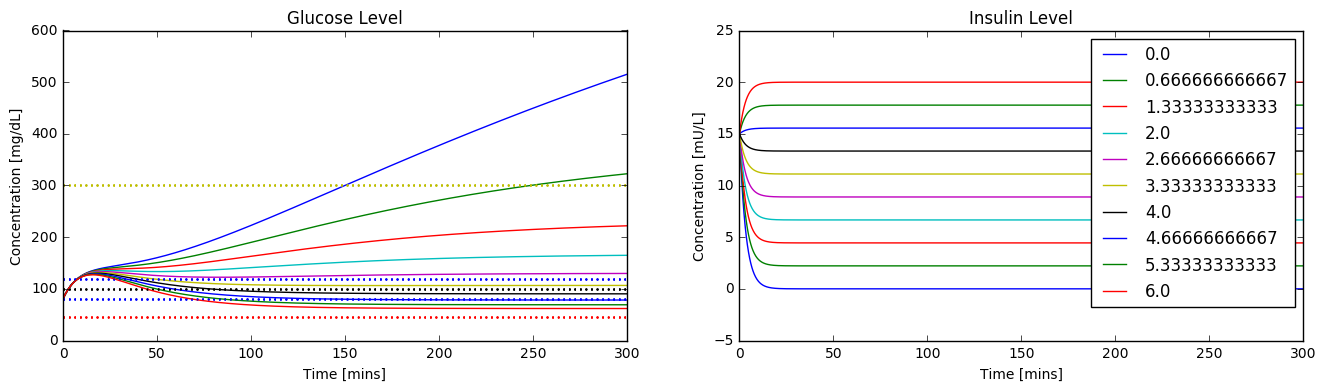

In [4]:
IC = [Gb,X0,Ib]                     # initial condition
t = np.linspace(0,300,2000)         # simulation time grid

uList = np.linspace(0,6,10)

plt.figure(figsize=(16,4))          # setup figure 
for u in uList:                     # for each insulin input rate
    Y = odeint(deriv,IC,t)          # perform simulation
    plotInsulin(t,Y)                # plot the results
    
plt.legend(uList)

Looking to the above simulation, the figure on the left illustrates the glucose level of the patient after being exposed to a meal.  The different lines represent different amounts of insulin being excreted by the controller to maintain the glucose level of the patient within an optimal range.  On the right is a plot of the concentration of insulin present in the patient.  The legend offers a rough measure of the amount of control being implemented - high values correspond to large insulin input rates and therefore large amounts of control, whereas low values correspond to little to no control.

As can be seen, when no control is implemented, the patient enters a hyperglycemic state.  When too much control is provided, the glucose concentration of the patient drops below the optimal range.  In order to better visualize how much insulin should be input per unit time by the controller, the above plot is recreated using a smaller control range.

<a id='Section07'></a>
#### 3.B. Closer Look at Ideal Insulin Input Rate

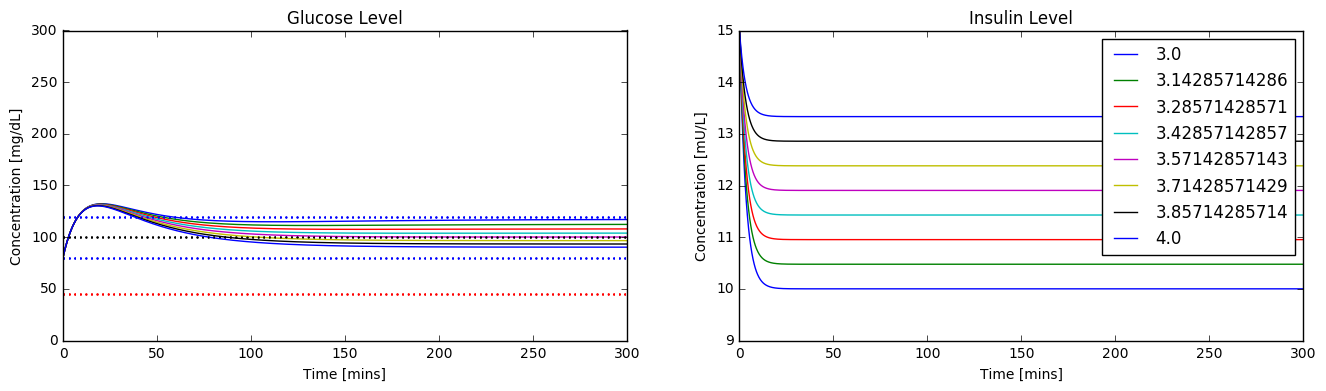

In [5]:
uList = np.linspace(3,4,8)

plt.figure(figsize=(16,4))              # setup figure 
for u in uList:                         # for each insulin input rate
    Y = odeint(deriv,IC,t)              # perform simulation
    plotInsulin(t,Y)                    # plot the results
    
plt.legend(uList)

Using this smaller control range, the glucose level of the patient has been contained within the ideal limits of 80 - 120 $\frac{mg}{dL}$.  From here, the insulin input rate which keeps the patient's glucose level most near the set point is determined to have a value of approximately 3.58 $\frac{mU}{L*min}$.  This value will be used in subsequent simulations.

<a id='Section08'></a>
#### 3.C. Constant Insulin Input Rate Simulation
In what follows, feedback control is implemented while assuming a constant insulin input rate ($U(t)$).

To perform the simulation, the time domain is broken into small time steps.  At each step, a control calculation is performed, the insulin input rate is updated, and odeint is used to simulate the blood sugar and insulin levels of the patient until the next breakpoint.  The simulation is carried out over a period of 5 hours with time steps of 1 minute. 

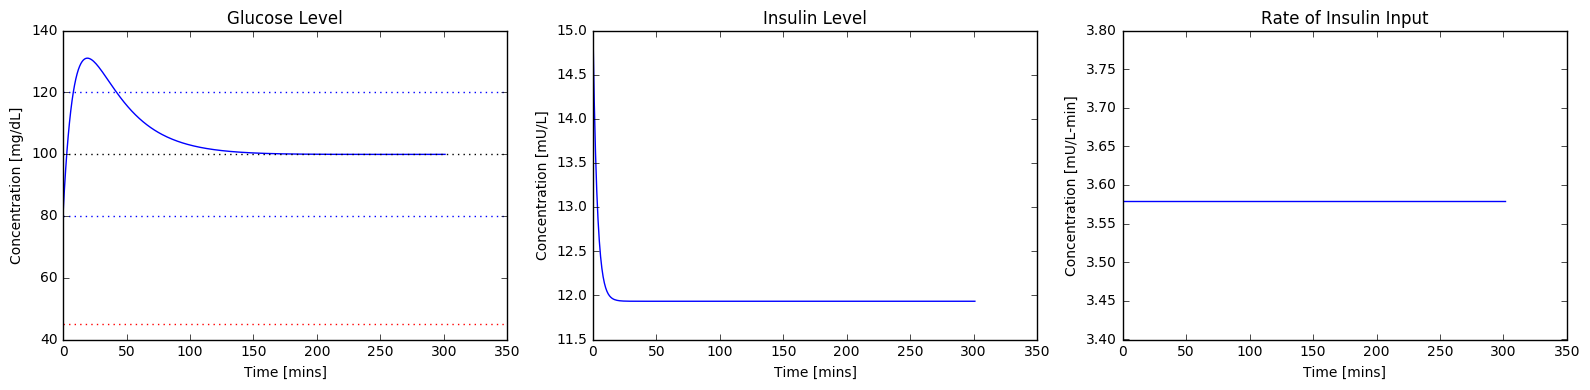

In [6]:
### Set initial conditions 
IC = [Gb,X0,Ib]

# Conduct simulation at fixed time steps dt
dt = 1
ti = 0
tf = 301

# create a list to log results
log = []

# Start simulation
G,X,I = IC
u = 3.58  # mU/L/min
for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,G,X,I,u])                      # log data for later plotting
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]   # start at t, find state at t + dt

# Create a plot which shows the Glucose and Insulin levels of the patient, as well as the value of the insulin input rate
def iplot(log):
    log = np.asarray(log).T
    plt.figure(figsize=(16,4))
    # Plot of glucose level
    plt.subplot(1,3,1)
    plt.plot(log[0],log[1])
    if 'SetG' in globals():
        plt.plot(plt.xlim(),[SetG,SetG],'k:')
        plt.plot(plt.xlim(),[Gmax,Gmax],'b:')
        plt.plot(plt.xlim(),[Gmin,Gmin],'b:')
    plt.title('Glucose Level')
    plt.ylabel('Concentration [mg/dL]')
    plt.xlabel('Time [mins]')
    
    # Plot of insulin level
    plt.subplot(1,3,2)
    plt.plot(log[0],log[3])
    plt.title('Insulin Level')
    plt.ylabel('Concentration [mU/L]')
    plt.xlabel('Time [mins]')

    # Plot of control function
    plt.subplot(1,3,3)
    plt.plot(log[0],log[4])
    plt.title('Rate of Insulin Input')
    plt.ylabel('Concentration [mU/L-min]')
    plt.xlabel('Time [mins]')
    plt.tight_layout()

SS = log[-1]
iplot(log)
plt.subplot(1,3,1)
plt.plot(plt.xlim(),[Ghypo,Ghypo],'r:')

<a id='Section09'></a>
#### 3.D. PI Controlled Insulin Input Rate

Though keeping the insulin input rate constant does maintain the glucose level of the patient within the acceptable range for this particular meal, in practice the insulin input rate might vary depending on the magnitude of the blood sugar spike.  To account for this, Proportional-Integral control is implemented in the following section.

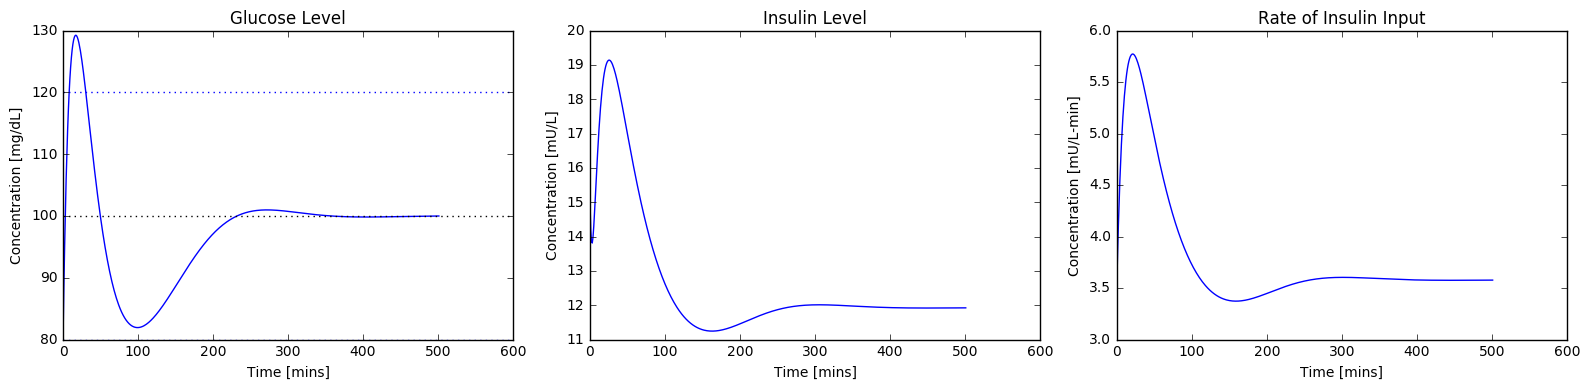

In [7]:
# Define setpoint
Gsp = SetG

# set initial conditions
IC = [Gb,X0,Ib,3.58]

# do simulation at fixed time steps dt
dt = 1.0
ti = 0.0
tf = 501

# control saturation
u_min = 0                            # minimum possible insulin input rate
u_max = 900                          # maximum possible insulin input rate
def sat(u):                          # function to return feasible value of u
    return max(u_min,min(u_max,u))

# control parameters
kp = 0.04
ki = 0.0008
kd = 0
beta = 0
gamma = 0

# create python list to log results
log = []

# start simulation
G,X,I,u = IC

eP_ = beta*Gsp - G
eD_ = gamma*Gsp - G
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    eP = beta*Gsp - G
    eI = Gsp - G
    eD = gamma*Gsp - G
    u -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    u = sat(u)
    
    # log data and update state
    log.append([t,G,X,I,u])
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP

iplot(log)

As the above simulation shows - immediately after consuming a meal, the patient's glucose level spikes to a maximum value of ~ 130 $\frac{mg}{dL}$.  In response, the controller ramps up the rate at which insulin is being input into the body.  This causes a sudden decrease in the glucose level of the patient, to which the controller responds by decreasing the insulin input rate.  Eventually, once the patient's body reaches steady-state level of glucose, the rate of insulin input returns to the nominal value of 3.58 $\frac{mU}{L*min}$.  The simulation suggests that the time required for the patient's glucose and insulin levels to approach a steady-state is ~400 minutes, or roughly 6.7 hours.

<a id='Section10'></a>
## 4. Negative Disturbance: Exposure to Exercise

To simulate a sudden drop in the patient's blood sugar level, an event which may occur after a period of intense physical activity, the disturbance function is modified such that the pre-exponential factor takes a negative value.

In [8]:
# Define exercise disturbance function
D0ex = -8
def D(t):
    return D0ex*np.exp(-drate*t)

<a id='Section11'></a>
#### 4.A. Constant Insulin Input Rate Simulation

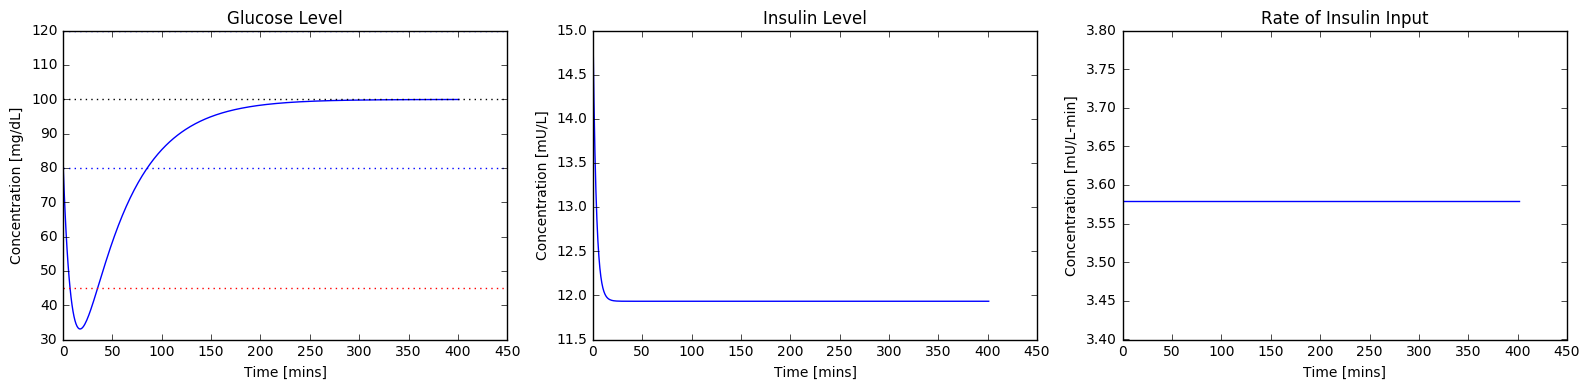

In [9]:
### Set initial conditions 
IC = [Gb,X0,Ib]

# Conduct simulation at fixed time steps dt
dt = 1
ti = 0
tf = 401

# create a list to log results
log = []

# Start simulation
G,X,I = IC
u = 3.58  # mU/L/min
for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,G,X,I,u])                      # log data for later plotting
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]   # start at t, find state at t + dt

SS = log[-1]
iplot(log)
plt.subplot(1,3,1)
plt.plot(plt.xlim(),[Ghypo,Ghypo],'r:')

<a id='Section12'></a>
#### 4.B. PI Controlled Insulin Input Rate

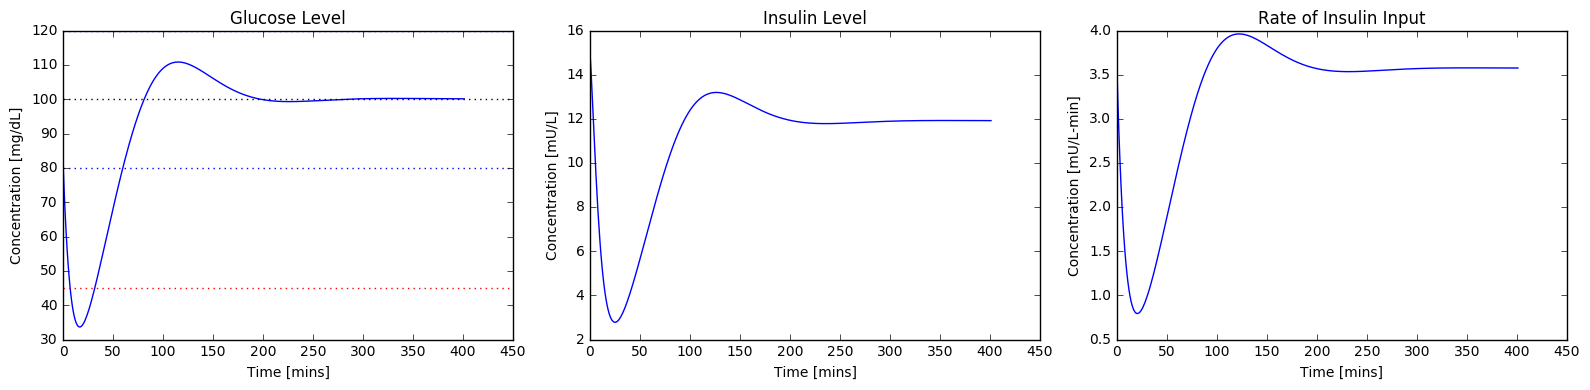

In [10]:
# Define setpoint
Gsp = SetG

# set initial conditions
IC = [Gb,X0,Ib,3.58]

# do simulation at fixed time steps dt
dt = 1.0
ti = 0.0
tf = 401

# control saturation
u_min = 0                            # minimum possible insulin input rate
u_max = 900                          # maximum possible insulin input rate
def sat(u):                          # function to return feasible value of u
    return max(u_min,min(u_max,u))

# control parameters
kp = .05
ki = 0.0004
kd = 0
beta = 0
gamma = 0

# create python list to log results
log = []

# start simulation
G,X,I,u = IC

eP_ = beta*Gsp - G
eD_ = gamma*Gsp - G
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    eP = beta*Gsp - G
    eI = Gsp - G
    eD = gamma*Gsp - G
    u -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    u = sat(u)
    
    # log data and update state
    log.append([t,G,X,I,u])
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP

iplot(log)
plt.subplot(1,3,1)
plt.plot(plt.xlim(),[Ghypo,Ghypo],'r:')

As in the simulation with constant insulin input rate [above](#Section10), the glucose level of the patient in this system enters the dangerous hypoglycemic region for a brief amount of time.  This simulation does serve to illustrate, however, the response of the controller to a negative disturbance.  As the patient's glucose level rapidly drops, the controller responds by drastically reducing the rate of insulin excretion.  Unfortunately, due to the time-delay associated with a reactive controller, it is impossible to avoid the observed spike into the hypoglycemic region using feedback control.  In practice, the patient might anticipate the sudden drop in blood sugar and manually decrease the insulin input rate (a means of implementing feed-forward control).

<a id='Section13'></a>
## 5. Combined Disturbances: Snack, Exercise, Meal

Perhaps more practical than just experiencing a single disturbance, the following simulation accounts for a multitude of disturbances varying in magnitude.

In this simulation, a snack is consumed at hour 0.  Next, exercise occurs at hour 6.  Finally, a full-size meal is consumed at hour 12.  The simulation is carried out over a period of 18 hours.  To conduct such a simulation, the pre-exponential term of the disturbance function is again modified to take on a different value at each of the above-mentioned times.

In [11]:
# Define combined disturbance function
D0snack = 3
D0ex = -7
D0meal = 5
D0 = [D0snack,D0ex,D0meal]

t1 = 6*60        # time at which exercise begins
t2 = 12*60       # time at which meal is consumed
tmax = 18*60

t = 0.0
for t in range(0,tmax):
    def D(t):
        if t < t1:
            return D0[0]*np.exp(-drate*t)
        elif t < t2:
            return D0[1]*np.exp(-drate*(t-t1))
        else:
            return D0[2]*np.exp(-drate*(t-t2))

<a id='Section14'></a>
#### 5.A. Constant Insulin Input Rate Simulation

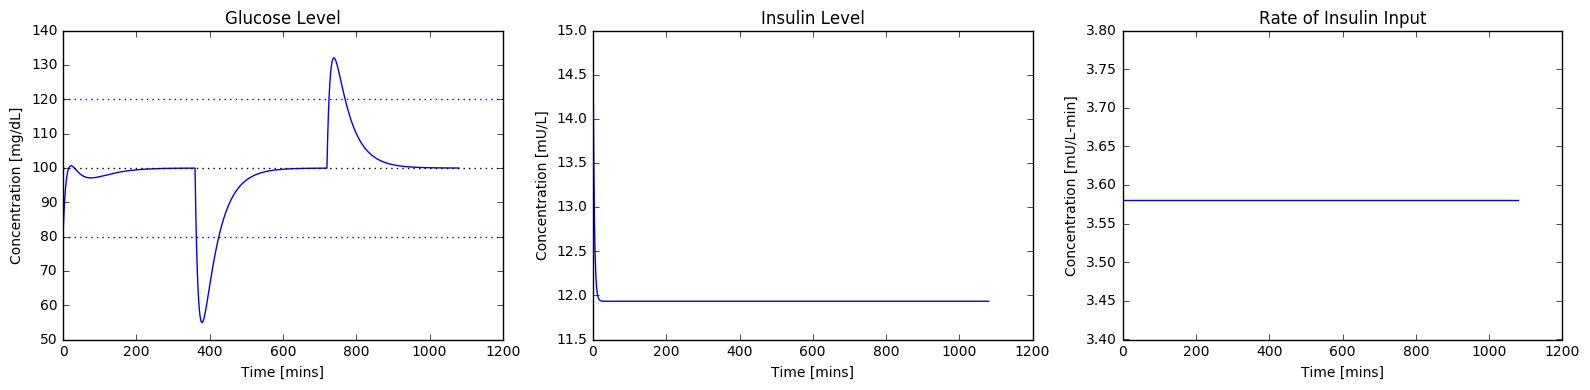

In [12]:
### Set initial conditions 
IC = [Gb,X0,Ib]

# Conduct simulation at fixed time steps dt
dt = 1
ti = 0
tf = tmax

# create a list to log results
log = []

# Start simulation
G,X,I = IC
u = 3.58  # mU/L/min
for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,G,X,I,u])                      # log data for later plotting
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]   # start at t, find state at t + dt

SS = log[-1]
iplot(log)

<a id='Section15'></a>
#### 5.B. PI Controlled Insulin Input Rate

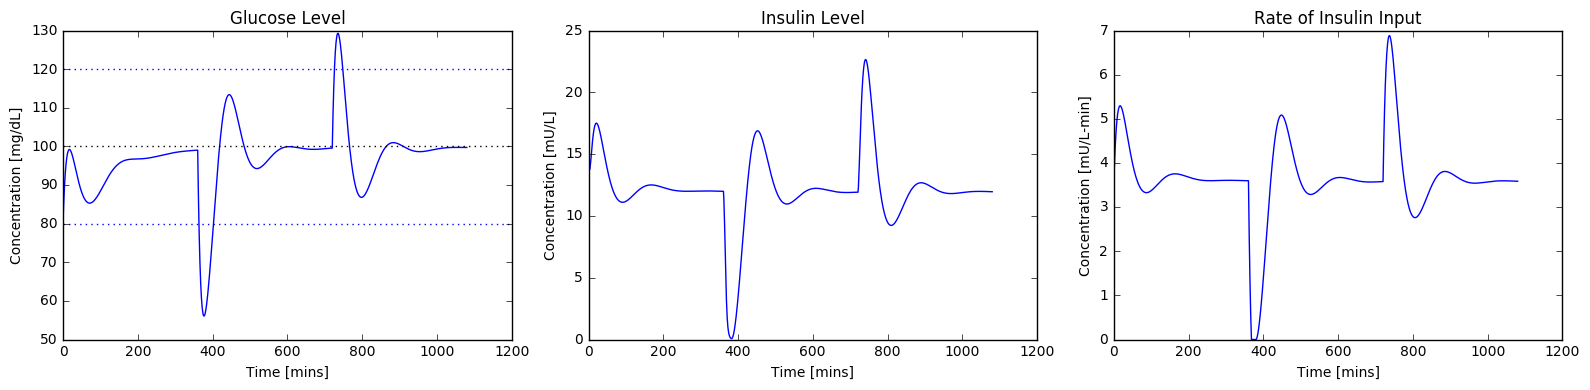

In [13]:
# Define setpoint
Gsp = SetG

# set initial conditions
IC = [Gb,X0,Ib,3.58]

# do simulation at fixed time steps dt
dt = 1.0
ti = 0.0
tf = tmax

# control saturation
u_min = 0                            # minimum possible insulin input rate
u_max = 900                          # maximum possible insulin input rate
def sat(u):                          # function to return feasible value of u
    return max(u_min,min(u_max,u))

# control parameters
kp = 0.1
ki = 0.00096
kd = 0
beta = 0
gamma = 0

# create python list to log results
log = []

# start simulation
G,X,I,u = IC

eP_ = beta*Gsp - G
eD_ = gamma*Gsp - G
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    eP = beta*Gsp - G
    eI = Gsp - G
    eD = gamma*Gsp - G
    u -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    u = sat(u)
    
    # log data and update state
    log.append([t,G,X,I,u])
    G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]     # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP

iplot(log)

Even with control, the large magnitude of the exercise and meal disturbances makes it unable to maintain the patient's blood sugar level within the ideal range.  Importantly, PI control does minimize the time spent outside of the ideal range, though.  

<a id='Section16'></a>
#### 5.C. Interactive PID Controlled Simulation 

Adding a derivative element of control to the controller further fine-tunes the response by reducing the magnitude of the observed oscillations.  In the following, an interactive element allows the user to modify the set point glucose concentration, as well as the magnitude of proportional, integral, and derivative control gains.

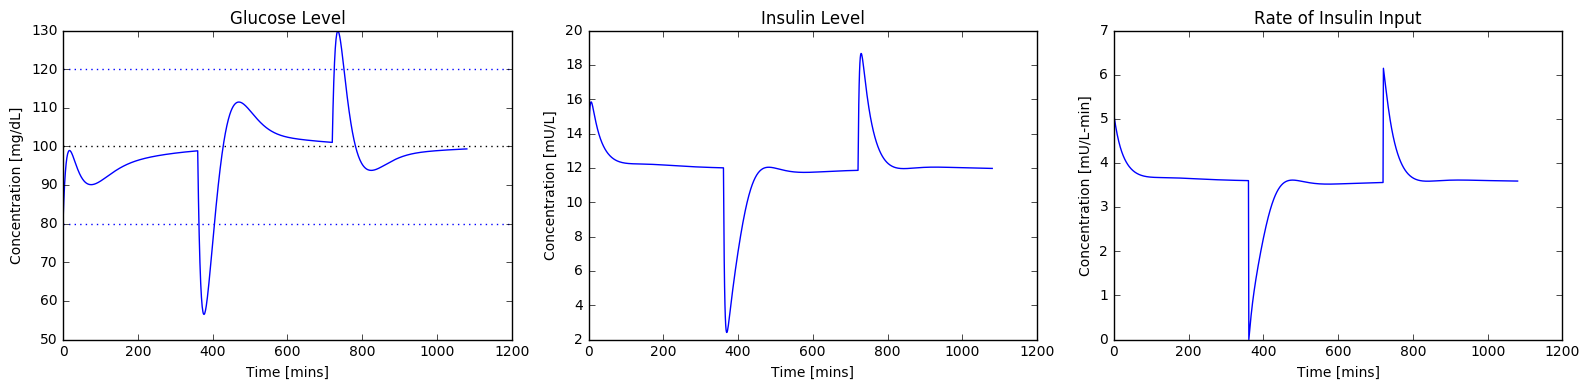

In [14]:
from ipywidgets import interact

IC = [Gb,X0,Ib]

def sim(Gsetpoint,kpmult,kimult,kdmult):
    global Gsp, u
    Gsp = Gsetpoint
    kp = 0.1/100
    ki = 0.00096/100
    kd = 1/100
    # control parameters
    beta = 0
    gamma = 0

    # create python list to log results
    log = []

    # start simulation
    G,X,I = IC
    u = 3.5

    eP_ = beta*Gsp - G
    eD_ = gamma*Gsp - G
    eD__ = eD_

    for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
        # PID control calculations
        eP = beta*Gsp - G
        eI = Gsp - G
        eD = gamma*Gsp - G
        u -= kpmult*kp*(eP - eP_) + kimult*ki*dt*eI + kdmult*kd*(eD - 2*eD_ + eD__)/dt
        u = sat(u)

        # log data and update state
        log.append([t,G,X,I,u])
        G,X,I = odeint(deriv,[G,X,I],[t,t+dt])[-1]     # start at t, find state at t + dt
    
        # save data for PID calculations
        eD__ = eD_
        eD_ = eD
        eP_ = eP

    iplot(log)
    
interact(sim,Gsetpoint = (80.0,120.0,1),kpmult =(0,100,1), kimult=(0,100,1), kdmult=(0,100,1));

<a id='Section17'></a>
## 6. Conclusion

The artificial pancreas model developed above is able to successfully correct for both positive disturbances to blood glucose levels, such as food intake, and negative disturbances, such as exercise. It does this by adjusting the rate at which insulin is administered: The input increases with a positive disturbance, and either decreases or shuts off completely with a negative disturbance. 

The control constants allow glucose levels to be maintained in a safe range of above 45 $\frac{mg}{dL}$ at all times to avoid immediately harmful hypoglycemia, and below 300 $\frac{mg}{dL}$ to avoid hyperglycemia and the long-term health issues that accompany it.  Fine-tuning of the control constants ensure glucose levels are kept within the tolerable range, displayed between 80 and 120 $\frac{mg}{dL}$, to ultimately reach a setpoint of 100 $\frac{mg}{dL}$.  Unfortunately, due to the reactive nature of feedback controllers such as the one implemented above, initial spikes outside of the safe and tolerable ranges are largely unavoidable.  Therefore, some element of manual feed-forward control is necessary, especially in anticipation of decreasing glucose levels, to minimize or eliminate time spent in these potentially dangerous regions.

In practice, the control constants will vary from person to person due to variance in their eating habits and/or metabolic rates. However, they could be calibrated after observing the patient’s blood glucose levels and corresponding activities and disturbances. This can be found and modified using the interactive model above, which allows for adjustment of the control parameters. Once the disturbances are changed in the code, the control parameters can be changed and visual feedback of glucose and insulin input levels will be given. With the setpoint and safe range displayed as well, an optimal group of constants can be determined manually.  

<a id='Section18'></a>
## 7. Literature Cited:

Bergman, R. N., R. Prager, A. Volund, and J.M. Olefsky (1985)," Equivalence of the Insulin Sensitivity Index in Man Derived by the Minimal Model Method and the Euglycemic Glucose Clamp", The American Society for Clinical Investigation, Volume 79: 790-800.

Friis-Jensen, Esben. "Modeling and Simulation of Glucose-Insulin Metabolism." PDF. N.p., n.d. Web. 12 Apr. 2017.

Kantor, Jeff. "Implementing PID Control in Nonlinear Simulations." GitHub, 23 Apr. 2017. Web. 23 Apr. 2017.

L. Kovacs, B. Kulcsar, J. Bokor and Z. Benyo, "Model-based nonlinear optimal blood glucose control of Type I diabetes patients," 2008 30th Annual International Conference of the IEEE Engineering in Medicine and Biology Society, Vancouver, BC, 2008, pp. 1607-1610.

McCall, A. L., and L. S. Farhy. “Treating Type 1 Diabetes: From Strategies for Insulin Delivery to Dual Hormonal Control.” Minerva endocrinologica 38.2 (2013): 145–163. Print.

Seborg, Dale E.  Process Dynamics and Control.  Hoboken, NJ: Wiley, 2011. Print.

V. R. Thupili and S. K., "Multi Model Based Controller Design for Type 1 Diabetic Patients," 2009 International Conference on Advances in Recent Technologies in Communication and Computing, Kottayam, Kerala, 2009, pp. 714-718.